In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def System(z,t):
    x,y = z
    dx = 2*x-y
    dy = x+2*y
    return np.array([dx,dy])
    

In [44]:
def rungekutta4_system(x,h,f,y0):
    y = np.zeros_like(x)
    y[0] = y0[0]
    z = np.zeros_like(x)
    z[0] = y0[1]
    for i in range(1,len(x)):
        
        k1 = f((y[i-1],z[i-1]),x[i-1])
        k2 = f((y[i-1] + 0.5*h*k1[0],z[i-1] + 0.5*h*k1[1]),x[i-1]+0.5*h)
        k3 = f((y[i-1] + 0.5*h*k2[0],z[i-1] + 0.5*h*k2[1]),x[i-1]+0.5*h)
        k4 = f((y[i-1] +h*k3[0],z[i-1] + 0.5*h*k3[1]),x[i-1]+h)
        
        y[i] = y[i-1] + (h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        z[i] = z[i-1] + (h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
    return y,z

In [45]:
def GetAdams_4_system(f,x,yrk1):
    
    h = x[1] - x[0] 
    y = yrk1[0].copy()
    
    yc = y.copy()
    z = yrk1[1].copy()
    zc = z.copy()    
    for i in range(4,len(x)):
        R_bashforth = (1/24)*h*( 55*f((y[i-1],z[i-1]),x[i-1]) - 59*f((y[i-2],z[i-2]),x[i-2]) +37*f((y[i-3],z[i-3]),x[i-3])-9*f((y[i-4],z[i-4]),x[i-4]) )
        
        y[i] = y[i-1] + R_bashforth[0]
        z[i] = z[i-1] + R_bashforth[1]
        yc[i] = y[i]
        zc[i] = z[i]
        # Moulton 5 orden
        R_Moulton = (1/720)*h*(251*f((y[i],z[i]),x[i])+646*f((y[i-1],z[i-1]),x[i-1])-264*f((y[i-2],z[i-2]),x[i-2])+106*f((y[i-3],z[i-3]),x[i-3])-19*f((y[i-4],z[i-4]),x[i-4]))
        
        yc[i] = yc[i-1] + R_Moulton[0]
        zc[i] = zc[i-1] + R_Moulton[1]
    
    return y,yc,z,zc

In [49]:

A = np.array([[2, -1],
              [1, 2]])


eigenvalues, eigenvectors = np.linalg.eig(A)

print("Valores propios:")
print(eigenvalues)
print("\nVectores propios:")
print(eigenvectors)

Valores propios:
[2.+1.j 2.-1.j]

Vectores propios:
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [62]:
t = np.linspace(0,3,1000)
r0 = [0.1,0.]
yrk4s = rungekutta4_system(t,t[1]-t[0],System,r0)
xbash,xmoulton_1,ybash,ymoulton_1 =GetAdams_4_system(System,t,yrk4s)
r0 = [0,0.1]
yrk4s = rungekutta4_system(t,t[1]-t[0],System,r0)
xbash,xmoulton_2,ybash,ymoulton_2 =GetAdams_4_system(System,t,yrk4s)
r0 = [0,-0.1]
yrk4s = rungekutta4_system(t,t[1]-t[0],System,r0)
xbash,xmoulton_3,ybash,ymoulton_3 =GetAdams_4_system(System,t,yrk4s)
r0 = [-0.1,0]
yrk4s = rungekutta4_system(t,t[1]-t[0],System,r0)
xbash,xmoulton_4,ybash,ymoulton_4 =GetAdams_4_system(System,t,yrk4s)

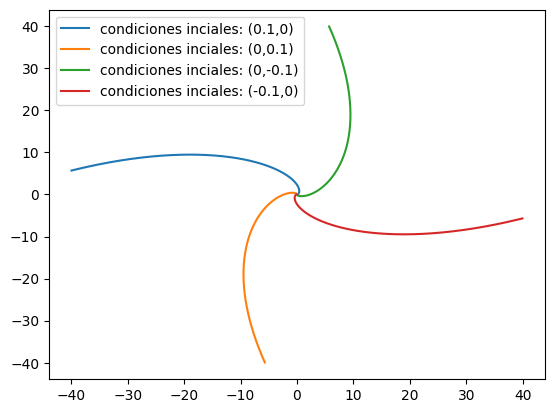

In [64]:
plt.plot(xmoulton_1,ymoulton_1,label="condiciones inciales: (0.1,0)")
plt.plot(xmoulton_2,ymoulton_2,label="condiciones inciales: (0,0.1)")
plt.plot(xmoulton_3,ymoulton_3,label="condiciones inciales: (0,-0.1)")
plt.plot(xmoulton_4,ymoulton_4,label="condiciones inciales: (-0.1,0)")
plt.legend()

In [57]:
print("De acuerdo con lo observado en la gráfica en el punto crítico es el punto (0,0) del espacio fase.")

De acuerdo con lo observado en la gráfica en el punto crítico es el punto (0,0) del espacio fase.
